# **_Titanic Dataset Solution_**
***

<br><br><br>To solve the titanic dataset we need to follow the following steps:-
    * Import the required Libraries.
    * Load the the training and test datasets.
    * Visualise the data with the help of graphs.
    * Carry out data analysis and data cleaning.
    * Make predictions.

## _Importing the required libraries:-_<br>

In [97]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

<br>
## _Loading the training and test datasets. And combine them into a single dataset- combine._ <br>

In [98]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")
combine = [train, test]
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [99]:
test.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

<br>
## _Analysing the Data_<br>

Printing the first 10 fields of train.....

In [100]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Printing the last 10 fields of train....

In [101]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [102]:
train.info()
print("_"*100+"\n")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
____________________________________________________________________________________________________

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64


In [103]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Harper, Miss. Annie Jessie ""Nina""",male,1601,G6,S
freq,1,577,7,4,644


In [105]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [106]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [107]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [108]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<br>
## _Data Visualisation_<br>

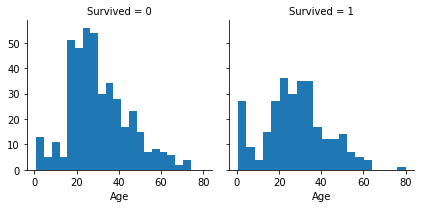

In [109]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

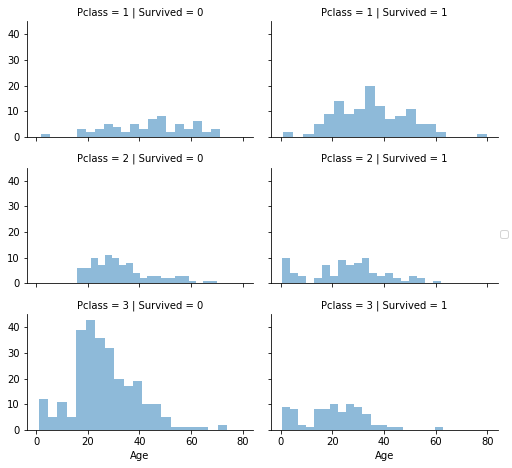

In [110]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


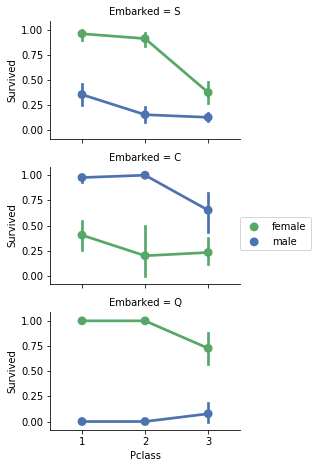

In [111]:
grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.5/dist-packages/seaborn/axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


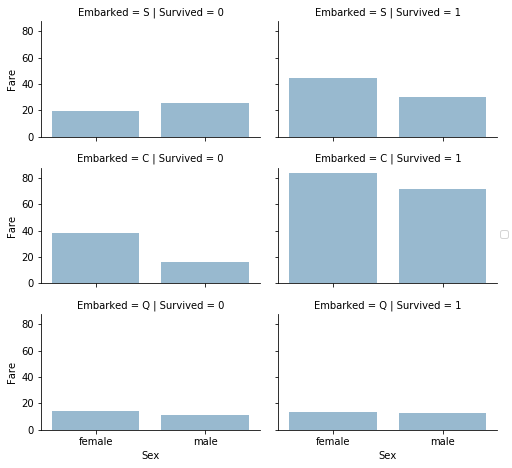

In [112]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

<br>
## _Data Cleaning_<br>

In [113]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

In [114]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [115]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
    dataset['Title'] = dataset['Title'].fillna(0)
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [116]:
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
2,3,0.793651
1,2,0.702703
3,4,0.575000
4,5,0.347826
0,1,0.156673


In [117]:
train = train.drop(["Name", "PassengerId"], axis=1)
train.head(11)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
5,0,3,0,NaN,0,0,8.4583,Q,1
6,0,1,0,54.0,0,0,51.8625,S,1
7,0,3,0,2.0,3,1,21.0750,S,4
8,1,3,1,27.0,0,2,11.1333,S,3
9,1,2,1,14.0,1,0,30.0708,C,3


In [118]:
guess_age = np.zeros((2, 3))
for i in range(0, 2):
    for j in range(0, 3):
        guess = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess.median()
        guess_age[i, j] = age_guess  
guess_age

array([[ 42.,  28.,  24.],
       [ 41.,  24.,  22.]])

In [119]:
for i in range(0, 2):
    for j in range(0, 3):
        train.loc[ (train.Age.isnull()) & (train.Sex == i) & (train.Pclass == j+1),'Age'] = guess_age[i,j]
        test.loc[ (test.Age.isnull()) & (test.Sex == i) & (test.Pclass == j+1),'Age'] = guess_age[i,j]
train['Age'] = train['Age'].astype(int)
test['Age'] = test['Age'].astype(int)

In [120]:
train['Age'].head()

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int64

In [121]:
test['Age'].head()

0    34
1    47
2    62
3    27
4    22
Name: Age, dtype: int64

In [122]:
train['AgeBand'] = pd.cut(train['Age'], 5)
test['AgeBand'] = pd.cut(test['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [123]:
combine = [train, test]
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, ['Age']] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), ['Age']] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), ['Age']] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), ['Age']] = 3
    dataset.loc[ dataset['Age'] > 64, ['Age']] = 4
train = train.drop(['AgeBand'], axis=1)
test = test.drop(['AgeBand'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [124]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [125]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [126]:
train = train.drop(['Parch', 'SibSp'], axis=1)
test = test.drop(['Parch', 'SibSp'], axis=1)
combine = [train, test]

In [127]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,7.2500,S,1,2,0
1,1,1,1,2,71.2833,C,3,2,0
2,1,3,1,1,7.9250,S,2,1,1
3,1,1,1,2,53.1000,S,3,2,0
4,0,3,0,2,8.0500,S,1,1,1


In [128]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",0,2,7.8292,Q,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,7.0000,S,3,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,3,9.6875,Q,1,1,1
3,895,3,"Wirz, Mr. Albert",0,1,8.6625,S,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,12.2875,S,3,3,0


In [129]:
combine = [train, test]
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [130]:
freq_port = train.Embarked.dropna().mode()[0]
freq_port

'S'

In [131]:
train['Embarked'] = train['Embarked'].fillna(freq_port)
test['Embarked'] = test['Embarked'].fillna(freq_port)
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [132]:
test['Embarked'].head(11)

0     Q
1     S
2     Q
3     S
4     S
5     S
6     Q
7     S
8     C
9     S
10    S
Name: Embarked, dtype: object

In [133]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
train['FareBand'] = pd.cut(train['Fare'], 4)
test['FareBand'] = pd.cut(test['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 128.082]",0.368113
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [134]:
combine = [test, train]
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train = train.drop(['FareBand'], axis=1)
test = test.drop(['FareBand'], axis=1)
combine = [train, test]    

In [136]:
for dataset in combine:
    dataset.loc[ dataset['Embarked'] == 'S', 'Embarked'] = 0
    dataset.loc[ dataset['Embarked'] == 'C', 'Embarked'] = 1
    dataset.loc[ dataset['Embarked'] == 'Q', 'Embarked'] = 2
    dataset['Embarked'] = dataset['Embarked'].astype(int)

In [137]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,0,0,1,2,0,3
1,1,1,1,2,3,1,3,2,0,2
2,1,3,1,1,1,0,2,1,1,3
3,1,1,1,2,3,0,3,2,0,2
4,0,3,0,2,1,0,1,1,1,6
5,0,3,0,1,1,2,1,1,1,3
6,0,1,0,3,3,0,1,1,1,3
7,0,3,0,0,2,0,4,5,0,0
8,1,3,1,1,1,0,3,3,0,3
9,1,2,1,0,2,1,3,2,0,0


In [138]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,"Kelly, Mr. James",0,2,0,2,1,1,1,6
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,2,0,0,3,2,0,6
2,894,2,"Myles, Mr. Thomas Francis",0,3,1,2,1,1,1,6
3,895,3,"Wirz, Mr. Albert",0,1,1,0,1,1,1,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,0,3,3,0,3
5,897,3,"Svensson, Mr. Johan Cervin",0,0,1,0,1,1,1,0
6,898,3,"Connolly, Miss. Kate",1,1,0,2,2,1,1,3
7,899,2,"Caldwell, Mr. Albert Francis",0,1,2,0,1,3,0,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,1,0,1,3,1,1,3
9,901,3,"Davies, Mr. John Samuel",0,1,2,0,1,3,0,3


In [139]:
test = test.drop(['Name'], axis = 1)
test.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int64
Fare           418 non-null int64
Embarked       418 non-null int64
Title          418 non-null int64
FamilySize     418 non-null int64
IsAlone        418 non-null int64
Age*Class      418 non-null int64
dtypes: int64(10)
memory usage: 32.7 KB


In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int64
Fare          891 non-null int64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Age*Class     891 non-null int64
dtypes: int64(10)
memory usage: 69.7 KB


<br>
## _Making Predictions_<br>

In [141]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

<br>
I have made the predictions in 5 diff methods:-
    1. Linear SVC
    2. Decision Tree
    3. Random Forest
    4. Support Vector Machine
    5. logistic Regression.

<br>**_1. Linear SVC_**

In [142]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)

In [144]:
my_solution = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": Y_pred})
my_solution.to_csv("solutions/linear_svc.csv", index = False)
my_solution.shape

(418, 2)

In [145]:
linear_svc.score(X_train, Y_train)

0.81481481481481477

<br>
**_2. Decision Tree_**

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

In [ ]:
my_solution = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": Y_pred})
my_solution.to_csv("solutions/decision_tree.csv", index = False)
my_solution.shape

In [ ]:
decision_tree.score(X_train, Y_train)

<br>
**_3. Random Forest_**

In [146]:
random_forest = RandomForestClassifier(n_estimators=100, min_samples_split = 5, random_state = 1)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)

In [147]:
my_solution = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": Y_pred})
my_solution.to_csv("solutions/random_forest.csv", index = False)
my_solution.shape

(418, 2)

In [148]:
random_forest.score(X_train, Y_train)

0.87654320987654322

<br>
**_4. Support Vector Machine_**

In [149]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)

In [150]:
my_solution = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": Y_pred})
my_solution.to_csv("solutions/support_vector_machines.csv", index = False)
my_solution.shape

(418, 2)

In [151]:
svc.score(X_train, Y_train)

0.83838383838383834

<br>
**_5. Logistic Regression_**

In [152]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)

In [153]:
my_solution = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": Y_pred})
my_solution.to_csv("solutions/LogisticRegression.csv", index = False)
my_solution.shape

(418, 2)

In [154]:
logreg.score(X_train, Y_train)

0.81593714927048255